In [1]:
import pandas as pd

# 数据加载 parse_dates自动转换时间格式
data = pd.read_csv('user_balance_table.csv',parse_dates=['report_date'])
data

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [2]:
total_balance = data.groupby('report_date')['total_purchase_amt','total_redeem_amt'].sum()
total_balance

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [3]:
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]
redeem

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


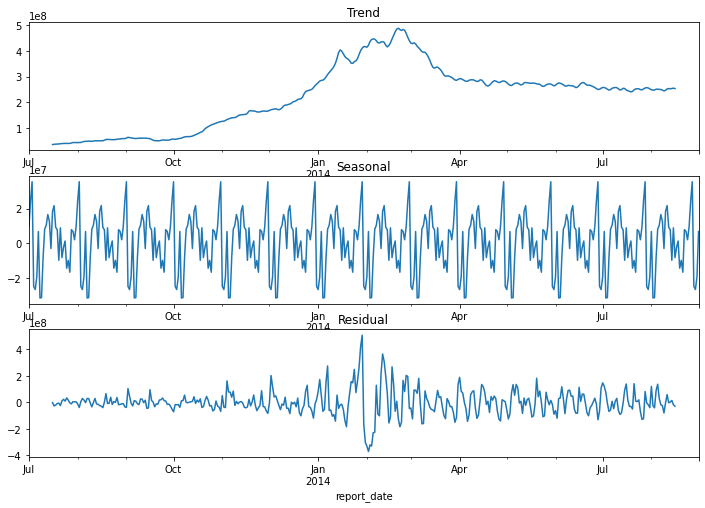

In [4]:
from statsmodels import api as sm 
import matplotlib.pyplot as plt
# 对指定区间范围内的数据，进行可视化
def plot_stl(data):
    # STL返回三个部分：trend(趋势)，seasonal(季节)，residual(残差)
    result = sm.tsa.seasonal_decompose(data, period=30)
    # 可视化
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2,title='Seasonal')
    result.resid.plot(ax=ax3,title='Residual')

plot_stl(purchase.total_purchase_amt)

In [5]:
purchase['ds'] = purchase.index
purchase.rename(columns={'total_purchase_amt':'y'},inplace=True)
redeem['ds'] = redeem.index
redeem.rename(columns={'total_redeem_amt':'y'},inplace=True)
purchase,redeem

(                     y         ds
 report_date                      
 2013-07-01    32488348 2013-07-01
 2013-07-02    29037390 2013-07-02
 2013-07-03    27270770 2013-07-03
 2013-07-04    18321185 2013-07-04
 2013-07-05    11648749 2013-07-05
 ...                ...        ...
 2014-08-27   302194801 2014-08-27
 2014-08-28   245082751 2014-08-28
 2014-08-29   267554713 2014-08-29
 2014-08-30   199708772 2014-08-30
 2014-08-31   275090213 2014-08-31
 
 [427 rows x 2 columns],
                      y         ds
 report_date                      
 2013-07-01     5525022 2013-07-01
 2013-07-02     2554548 2013-07-02
 2013-07-03     5953867 2013-07-03
 2013-07-04     6410729 2013-07-04
 2013-07-05     2763587 2013-07-05
 ...                ...        ...
 2014-08-27   468164147 2014-08-27
 2014-08-28   297893861 2014-08-28
 2014-08-29   273756380 2014-08-29
 2014-08-30   196374134 2014-08-30
 2014-08-31   292943033 2014-08-31
 
 [427 rows x 2 columns])

In [6]:
purchase = purchase.reset_index(drop=True)
redeem = redeem.reset_index(drop=True)

In [7]:
from fbprophet import Prophet

# 拟合Prophet模型
model = Prophet(weekly_seasonality=True, seasonality_prior_scale=0.1)
model.fit(purchase)


Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
# 预测未来1个月，9月份30天
future = model.make_future_dataframe(periods = 30)
purchase_pred = model.predict(future)
purchase_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.445073e+07,-8.551670e+07,1.546553e+08,-1.445073e+07,-1.445073e+07,4.490373e+07,4.490373e+07,4.490373e+07,4.490373e+07,4.490373e+07,4.490373e+07,0.0,0.0,0.0,3.045300e+07
1,2013-07-02,-1.329583e+07,-8.552617e+07,1.480298e+08,-1.329583e+07,-1.329583e+07,4.761234e+07,4.761234e+07,4.761234e+07,4.761234e+07,4.761234e+07,4.761234e+07,0.0,0.0,0.0,3.431651e+07
2,2013-07-03,-1.214094e+07,-9.500386e+07,1.335872e+08,-1.214094e+07,-1.214094e+07,3.769959e+07,3.769959e+07,3.769959e+07,3.769959e+07,3.769959e+07,3.769959e+07,0.0,0.0,0.0,2.555865e+07
3,2013-07-04,-1.098604e+07,-1.117506e+08,1.243944e+08,-1.098604e+07,-1.098604e+07,1.950475e+07,1.950475e+07,1.950475e+07,1.950475e+07,1.950475e+07,1.950475e+07,0.0,0.0,0.0,8.518707e+06
4,2013-07-05,-9.831147e+06,-1.458308e+08,7.924837e+07,-9.831147e+06,-9.831147e+06,-1.789062e+07,-1.789062e+07,-1.789062e+07,-1.789062e+07,-1.789062e+07,-1.789062e+07,0.0,0.0,0.0,-2.772177e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.010433e+08,6.241068e+07,2.990551e+08,1.976144e+08,2.049871e+08,-1.789062e+07,-1.789062e+07,-1.789062e+07,-1.789062e+07,-1.789062e+07,-1.789062e+07,0.0,0.0,0.0,1.831527e+08
453,2014-09-27,2.003053e+08,1.512772e+07,2.498372e+08,1.966513e+08,2.044699e+08,-6.953694e+07,-6.953694e+07,-6.953694e+07,-6.953694e+07,-6.953694e+07,-6.953694e+07,0.0,0.0,0.0,1.307683e+08
454,2014-09-28,1.995673e+08,2.154944e+07,2.580173e+08,1.956020e+08,2.040775e+08,-6.229285e+07,-6.229285e+07,-6.229285e+07,-6.229285e+07,-6.229285e+07,-6.229285e+07,0.0,0.0,0.0,1.372744e+08
455,2014-09-29,1.988292e+08,1.267053e+08,3.592031e+08,1.945572e+08,2.036804e+08,4.490373e+07,4.490373e+07,4.490373e+07,4.490373e+07,4.490373e+07,4.490373e+07,0.0,0.0,0.0,2.437330e+08


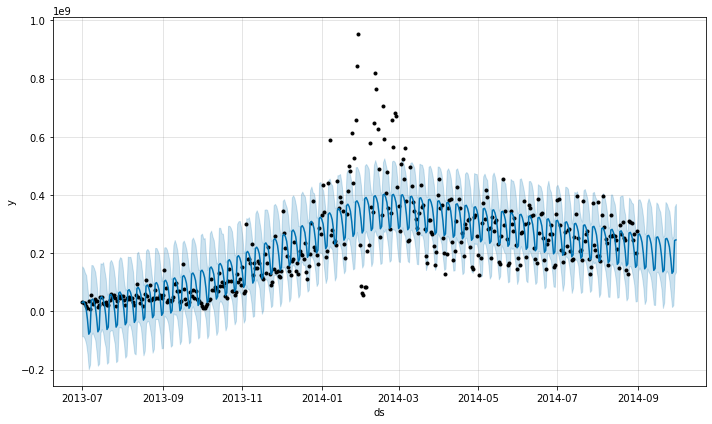

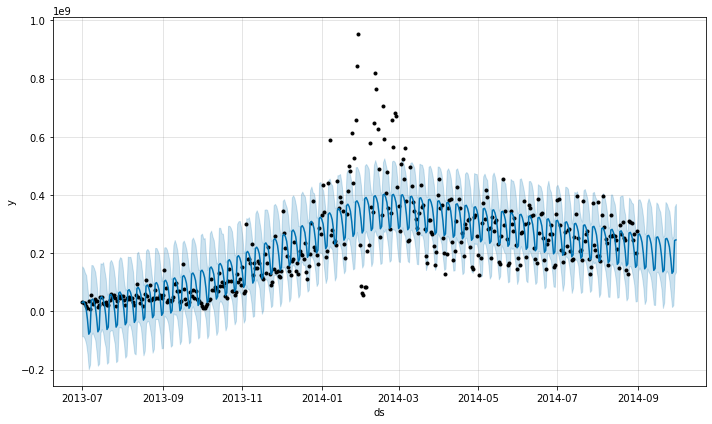

In [9]:
model.plot(purchase_pred)

In [15]:
# 拟合Prophet模型
model2 = Prophet(weekly_seasonality=True, seasonality_prior_scale=0.1)
model2.fit(redeem)
# 预测未来1个月，9月份30天
future = model2.make_future_dataframe(periods = 30)
redeem_pred = model2.predict(future)
redeem_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-2.497826e+07,-6.063772e+07,1.100409e+08,-2.497826e+07,-2.497826e+07,4.903356e+07,4.903356e+07,4.903356e+07,4.903356e+07,4.903356e+07,4.903356e+07,0.0,0.0,0.0,2.405530e+07
1,2013-07-02,-2.409187e+07,-9.287992e+07,8.291622e+07,-2.409187e+07,-2.409187e+07,2.278317e+07,2.278317e+07,2.278317e+07,2.278317e+07,2.278317e+07,2.278317e+07,0.0,0.0,0.0,-1.308696e+06
2,2013-07-03,-2.320548e+07,-7.969707e+07,8.713864e+07,-2.320548e+07,-2.320548e+07,2.490694e+07,2.490694e+07,2.490694e+07,2.490694e+07,2.490694e+07,2.490694e+07,0.0,0.0,0.0,1.701453e+06
3,2013-07-04,-2.231910e+07,-1.049382e+08,7.239806e+07,-2.231910e+07,-2.231910e+07,6.128221e+06,6.128221e+06,6.128221e+06,6.128221e+06,6.128221e+06,6.128221e+06,0.0,0.0,0.0,-1.619088e+07
4,2013-07-05,-2.143271e+07,-1.071908e+08,5.291061e+07,-2.143271e+07,-2.143271e+07,-4.533374e+06,-4.533374e+06,-4.533374e+06,-4.533374e+06,-4.533374e+06,-4.533374e+06,0.0,0.0,0.0,-2.596608e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.929297e+08,2.044830e+08,3.717390e+08,2.916011e+08,2.943405e+08,-4.533374e+06,-4.533374e+06,-4.533374e+06,-4.533374e+06,-4.533374e+06,-4.533374e+06,0.0,0.0,0.0,2.883963e+08
453,2014-09-27,2.931100e+08,1.482753e+08,3.149270e+08,2.916968e+08,2.946236e+08,-5.850677e+07,-5.850677e+07,-5.850677e+07,-5.850677e+07,-5.850677e+07,-5.850677e+07,0.0,0.0,0.0,2.346032e+08
454,2014-09-28,2.932903e+08,1.659308e+08,3.421747e+08,2.918188e+08,2.948936e+08,-3.981174e+07,-3.981174e+07,-3.981174e+07,-3.981174e+07,-3.981174e+07,-3.981174e+07,0.0,0.0,0.0,2.534785e+08
455,2014-09-29,2.934706e+08,2.605764e+08,4.245627e+08,2.919162e+08,2.951697e+08,4.903356e+07,4.903356e+07,4.903356e+07,4.903356e+07,4.903356e+07,4.903356e+07,0.0,0.0,0.0,3.425041e+08


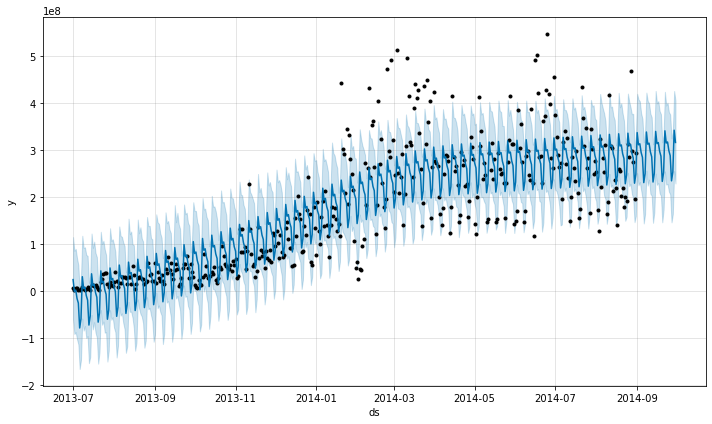

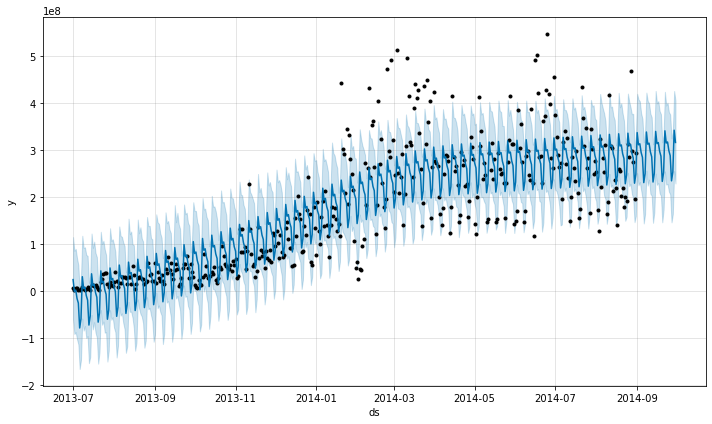

In [11]:
model2.plot(redeem_pred)

In [12]:
purchase2 = purchase_pred[(purchase_pred['ds'] >= '2014-09-01') & (purchase_pred['ds'] <= '2014-09-30')][['ds','yhat']]
purchase2

,ds,yhat
427,2014-09-01,2.643976e+08
428,2014-09-02,2.663682e+08
429,2014-09-03,2.557174e+08
430,2014-09-04,2.367846e+08
431,2014-09-05,1.986512e+08
432,2014-09-06,1.462668e+08
433,2014-09-07,1.527729e+08
434,2014-09-08,2.592315e+08
435,2014-09-09,2.612021e+08
436,2014-09-10,2.505513e+08


In [16]:
redeem2 = redeem_pred[(redeem_pred['ds'] >= '2014-09-01') & (redeem_pred['ds'] <= '2014-09-30')][['ds','yhat']]
redeem2

,ds,yhat
427,2014-09-01,3.374559e+08
428,2014-09-02,3.113858e+08
429,2014-09-03,3.136899e+08
430,2014-09-04,2.950915e+08
431,2014-09-05,2.846101e+08
432,2014-09-06,2.308170e+08
433,2014-09-07,2.496924e+08
434,2014-09-08,3.387180e+08
435,2014-09-09,3.126479e+08
436,2014-09-10,3.149519e+08


In [17]:
# 合并结果
result = pd.DataFrame()
result['ds'] = purchase2.ds
result['purchase_amt'] = purchase2.yhat
result['redeem_amt'] = redeem2.yhat
result['ds'] = result['ds'].apply(lambda x: str(x).replace('-','')[0:8])
result

,ds,purchase_amt,redeem_amt
427,20140901,2.643976e+08,3.374559e+08
428,20140902,2.663682e+08,3.113858e+08
429,20140903,2.557174e+08,3.136899e+08
430,20140904,2.367846e+08,2.950915e+08
431,20140905,1.986512e+08,2.846101e+08
432,20140906,1.462668e+08,2.308170e+08
433,20140907,1.527729e+08,2.496924e+08
434,20140908,2.592315e+08,3.387180e+08
435,20140909,2.612021e+08,3.126479e+08
436,20140910,2.505513e+08,3.149519e+08


In [18]:
result.to_csv('prophet.csv', header=None, index=False)